In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

In [2]:
#Loading the data
data=pd.read_csv('cardataset1.csv')

In [3]:
data.head(2)

,name,selling_price,km_driven,fuel,seller_type,transmission,owner,engine,max_power,seats
0,Maruti Swift Dzire VDI,450000,145500,Diesel,Individual,Manual,First Owner,1248.0,74,5.0
1,Skoda Rapid 1.5 TDI Ambition,370000,120000,Diesel,Individual,Manual,Second Owner,1498.0,103.52,5.0


In [4]:
#checking null values
data.isnull().sum()

name               0
selling_price      0
km_driven          0
fuel               0
seller_type        0
transmission       0
owner              0
engine           221
max_power        215
seats            221
dtype: int64

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8128 entries, 0 to 8127
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           8128 non-null   object 
 1   selling_price  8128 non-null   int64  
 2   km_driven      8128 non-null   int64  
 3   fuel           8128 non-null   object 
 4   seller_type    8128 non-null   object 
 5   transmission   8128 non-null   object 
 6   owner          8128 non-null   object 
 7   engine         7907 non-null   float64
 8   max_power      7913 non-null   object 
 9   seats          7907 non-null   float64
dtypes: float64(2), int64(2), object(6)
memory usage: 635.1+ KB


In [6]:
#removing everything from name except first letter
data['name']=data['name'].str.split(' ').str.slice(0,2).str.join(' ')

encoding the categorical data


In [7]:
#carname label encoding
car_name_le=LabelEncoder()
data['name']=car_name_le.fit_transform(data['name'])

In [8]:
fuel_le=LabelEncoder()
data['fuel']=fuel_le.fit_transform(data['fuel'])

In [9]:
seller_type_le=LabelEncoder()
data['seller_type']=seller_type_le.fit_transform(data['seller_type'])

In [10]:
transmission_type_le=LabelEncoder()
data['transmission']=transmission_type_le.fit_transform(data['transmission'])

In [11]:
owner_type_le=LabelEncoder()
data['owner']=owner_type_le.fit_transform(data['owner'])

In [12]:
data.head()

,name,selling_price,km_driven,fuel,seller_type,transmission,owner,engine,max_power,seats
0,126,450000,145500,1,1,1,0,1248.0,74,5.0
1,162,370000,120000,1,1,1,2,1498.0,103.52,5.0
2,56,158000,140000,3,1,1,4,1497.0,78,5.0
3,76,225000,127000,1,1,1,0,1396.0,90,5.0
4,126,130000,120000,3,1,1,0,1298.0,88.2,5.0


In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8128 entries, 0 to 8127
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           8128 non-null   int32  
 1   selling_price  8128 non-null   int64  
 2   km_driven      8128 non-null   int64  
 3   fuel           8128 non-null   int32  
 4   seller_type    8128 non-null   int32  
 5   transmission   8128 non-null   int32  
 6   owner          8128 non-null   int32  
 7   engine         7907 non-null   float64
 8   max_power      7913 non-null   object 
 9   seats          7907 non-null   float64
dtypes: float64(2), int32(5), int64(2), object(1)
memory usage: 476.4+ KB


In [14]:
#encoding fuel column
# data.replace({'fuel':{'Petrol':0,'Diesel':1,'CNG':2,'LPG':3}},inplace=True)

#encoding seller_type column
# data.replace({'seller_type':{'Individual':1,'Dealer':0,'Trustmark Dealer':2}},inplace=True)

#encoding transmission column
# data.replace({'transmission':{'Manual':0,'Automatic':1}},inplace=True)

# #encoding owner column
# data.replace({'owner':{'First Owner':0,'Second Owner':1,'Third Owner':2,'Fourth & Above Owner':3,'Test Drive Car':4}},inplace=True)

handling missing datas

In [15]:
import numpy as np
#remove this null value or handle it
data.replace(r'^\s*$', np.nan, regex=True, inplace=True)

In [16]:
#removing rows that has na values in max_power column
data=data[~data['engine'].isna()]

In [17]:
#removing rows that has na values in mileage column
data=data[~data['max_power'].isna()]

In [18]:
data.isnull().sum()

name             0
selling_price    0
km_driven        0
fuel             0
seller_type      0
transmission     0
owner            0
engine           0
max_power        0
seats            0
dtype: int64

In [19]:
# converting maxpower from object to float
data['max_power']=data['max_power'].astype(float)

In [20]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7906 entries, 0 to 8127
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           7906 non-null   int32  
 1   selling_price  7906 non-null   int64  
 2   km_driven      7906 non-null   int64  
 3   fuel           7906 non-null   int32  
 4   seller_type    7906 non-null   int32  
 5   transmission   7906 non-null   int32  
 6   owner          7906 non-null   int32  
 7   engine         7906 non-null   float64
 8   max_power      7906 non-null   float64
 9   seats          7906 non-null   float64
dtypes: float64(3), int32(5), int64(2)
memory usage: 525.0 KB


In [21]:
data.to_csv('CleanedCarData3.csv')

In [22]:
#droping selling price column from x-axis
X=data.drop(['selling_price'],axis=1)
#setting selling price as y-axis
Y=data['selling_price']

In [23]:
X

,name,km_driven,fuel,seller_type,transmission,owner,engine,max_power,seats
0,126,145500,1,1,1,0,1248.0,74.00,5.0
1,162,120000,1,1,1,2,1498.0,103.52,5.0
2,56,140000,3,1,1,4,1497.0,78.00,5.0
3,76,127000,1,1,1,0,1396.0,90.00,5.0
4,126,120000,3,1,1,0,1298.0,88.20,5.0
...,...,...,...,...,...,...,...,...,...
8123,76,110000,3,1,1,0,1197.0,82.85,5.0
8124,73,119000,1,1,1,1,1493.0,110.00,5.0
8125,126,120000,1,1,1,0,1248.0,73.90,5.0
8126,171,25000,1,1,1,0,1396.0,70.00,5.0


In [24]:
Y

0       450000
1       370000
2       158000
3       225000
4       130000
         ...  
8123    320000
8124    135000
8125    382000
8126    290000
8127    290000
Name: selling_price, Length: 7906, dtype: int64

Scaling the input data

In [25]:
from sklearn.preprocessing import StandardScaler

In [26]:
ss=StandardScaler()
X=pd.DataFrame(ss.fit_transform(X),columns=X.columns)
print(X)

          name  km_driven      fuel  seller_type  transmission     owner  \
0     0.369670   1.343777 -0.887058     0.277395      0.389408 -0.655358   
1     1.113637   0.894744 -0.887058     0.277395      0.389408  1.003442   
2    -1.076932   1.246926  1.110117     0.277395      0.389408  2.662242   
3    -0.663617   1.018008 -0.887058     0.277395      0.389408 -0.655358   
4     0.369670   0.894744  1.110117     0.277395      0.389408 -0.655358   
...        ...        ...       ...          ...           ...       ...   
7901 -0.663617   0.718652  1.110117     0.277395      0.389408 -0.655358   
7902 -0.725614   0.877135 -0.887058     0.277395      0.389408  0.174042   
7903  0.369670   0.894744 -0.887058     0.277395      0.389408 -0.655358   
7904  1.299628  -0.778124 -0.887058     0.277395      0.389408 -0.655358   
7905  1.299628  -0.778124 -0.887058     0.277395      0.389408 -0.655358   

        engine  max_power     seats  
0    -0.418188  -0.492024 -0.434128  
1     0.077

In [27]:
from sklearn.model_selection import train_test_split

In [28]:
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.2,random_state=42)

In [29]:
from sklearn.linear_model import LinearRegression,Lasso,Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor

In [30]:
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score

In [31]:

#checking the accuracy of the model for linear regression
lr=LinearRegression()
lr.fit(x_train,y_train)
y_pred_train = lr.predict(x_train)
y_pred_test = lr.predict(x_test)

# Calculate metrics
train_r2 = r2_score(y_train, y_pred_train)
test_r2 = r2_score(y_test, y_pred_test)
train_mse = mean_squared_error(y_train, y_pred_train)
test_mse = mean_squared_error(y_test, y_pred_test)
train_mae = mean_absolute_error(y_train, y_pred_train)
test_mae = mean_absolute_error(y_test, y_pred_test)

# Print results
print(f"Train R^2 Score: {train_r2}")
print(f"Test R^2 Score: {test_r2}")
print(f"Train Mean Squared Error: {train_mse}")
print(f"Test Mean Squared Error: {test_mse}")
print(f"Train Mean Absolute Error: {train_mae}")
print(f"Test Mean Absolute Error: {test_mae}")


Train R^2 Score: 0.6553829344150517
Test R^2 Score: 0.6616136990525139
Train Mean Squared Error: 225194778786.97015
Test Mean Squared Error: 235274256201.82373
Train Mean Absolute Error: 284871.4373566929
Test Mean Absolute Error: 280796.4051982372


C:\Users\Musharraf khan\AppData\Local\Temp\ipykernel_14912\2001522080.py:14: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k--" (-> color='k'). The keyword argument will take precedence.
  plt.plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], 'k--', lw=2, color='red')


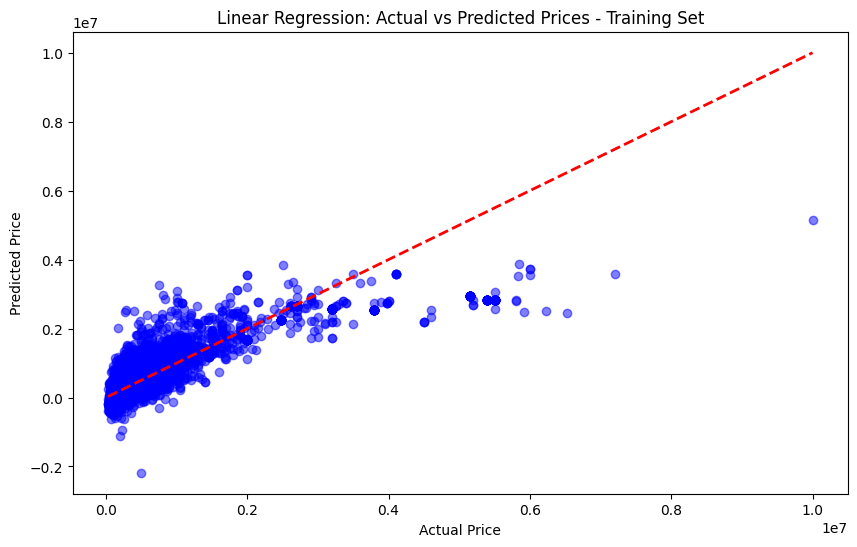

In [32]:
#prediction on Training data
# training_data_prediction=lr.predict(x_train)
# plt.scatter(y_train,training_data_prediction)
# plt.xlabel("Actual Price")
# plt.ylabel("Predicted Price")
# plt.title("Actual Prices vs Predicted Prices")
# plt.show()

y_pred_train = lr.predict(x_train)

# Plot actual vs. predicted prices for the training set
plt.figure(figsize=(10, 6))
plt.scatter(y_train, y_pred_train, color="blue", alpha=0.5)
plt.plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], 'k--', lw=2, color='red')
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Linear Regression: Actual vs Predicted Prices - Training Set')
plt.show()

C:\Users\Musharraf khan\AppData\Local\Temp\ipykernel_14912\56900207.py:13: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k--" (-> color='k'). The keyword argument will take precedence.
  plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2, color='red')


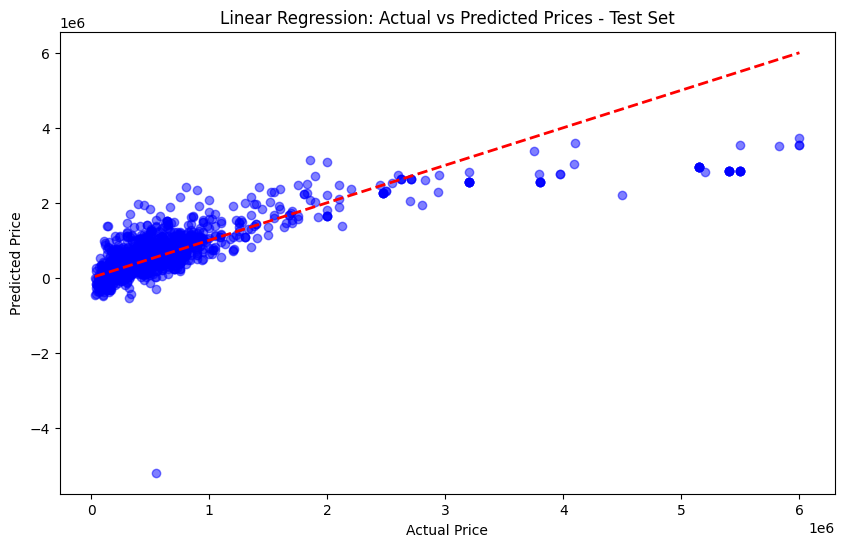

In [33]:
#prediction on Test data
# training_data_prediction=lr.predict(x_test)
# plt.scatter(y_test,training_data_prediction)
# plt.xlabel("Actual Price")
# plt.ylabel("Predicted Price")
# plt.title("Actual Prices vs Predicted Prices")
# plt.show()
y_pred_test = lr.predict(x_test)

# Plot actual vs. predicted prices for the test set
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_test, color="blue", alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2, color='red')
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Linear Regression: Actual vs Predicted Prices - Test Set')
plt.show()

In [34]:
#checking the accuracy of the model for lasso regression

las = Lasso()
las.fit(x_train, y_train)

# Predictions
y_pred_train = las.predict(x_train)
y_pred_test = las.predict(x_test)

# Calculate metrics
train_r2 = r2_score(y_train, y_pred_train)
test_r2 = r2_score(y_test, y_pred_test)
train_mse = mean_squared_error(y_train, y_pred_train)
test_mse = mean_squared_error(y_test, y_pred_test)
train_mae = mean_absolute_error(y_train, y_pred_train)
test_mae = mean_absolute_error(y_test, y_pred_test)

# Print results
print(f"Train R^2 Score: {train_r2}")
print(f"Test R^2 Score: {test_r2}")
print(f"Train Mean Squared Error: {train_mse}")
print(f"Test Mean Squared Error: {test_mse}")
print(f"Train Mean Absolute Error: {train_mae}")
print(f"Test Mean Absolute Error: {test_mae}")

Train R^2 Score: 0.6553829343965345
Test R^2 Score: 0.6616137468933347
Train Mean Squared Error: 225194778799.0704
Test Mean Squared Error: 235274222938.91238
Train Mean Absolute Error: 284870.88034830237
Test Mean Absolute Error: 280795.9375242427


In [35]:
#checking the accuracy of the model for decision tree
dt=DecisionTreeRegressor(max_depth=10)
dt.fit(x_train,y_train)

y_pred_train = dt.predict(x_train)
y_pred_test = dt.predict(x_test)

# Calculate metrics
train_r2 = r2_score(y_train, y_pred_train)
test_r2 = r2_score(y_test, y_pred_test)
train_mse = mean_squared_error(y_train, y_pred_train)
test_mse = mean_squared_error(y_test, y_pred_test)
train_mae = mean_absolute_error(y_train, y_pred_train)
test_mae = mean_absolute_error(y_test, y_pred_test)

# Print results
print(f"Train R^2 Score: {train_r2}")
print(f"Test R^2 Score: {test_r2}")
print(f"Train Mean Squared Error: {train_mse}")
print(f"Test Mean Squared Error: {test_mse}")
print(f"Train Mean Absolute Error: {train_mae}")
print(f"Test Mean Absolute Error: {test_mae}")

Train R^2 Score: 0.9741560027422314
Test R^2 Score: 0.9210754304622463
Train Mean Squared Error: 16888116772.614244
Test Mean Squared Error: 54874914681.98004
Train Mean Absolute Error: 87756.6032059582
Test Mean Absolute Error: 113888.90259374036


C:\Users\Musharraf khan\AppData\Local\Temp\ipykernel_14912\661009427.py:14: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k--" (-> color='k'). The keyword argument will take precedence.
  plt.plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], 'k--', lw=2, color='red')


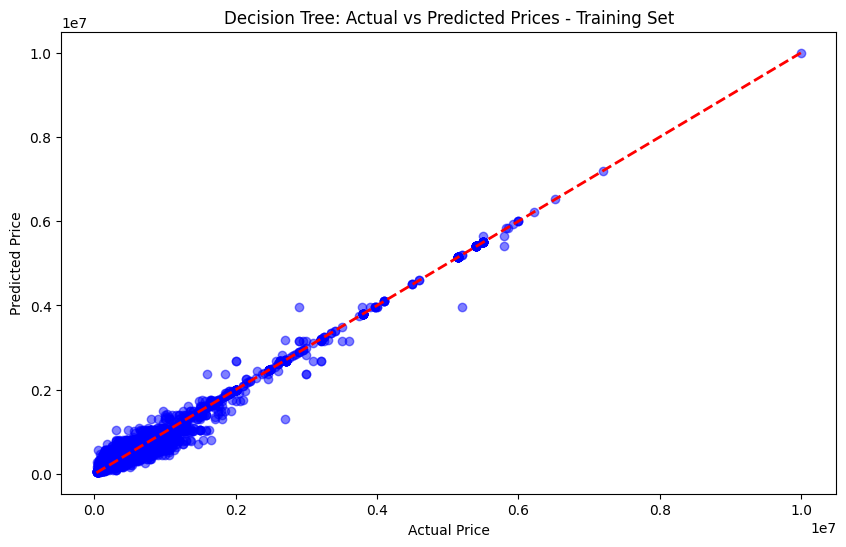

In [36]:
#prediction on Training data
# training_data_prediction=dt.predict(x_train)
# plt.scatter(y_train,training_data_prediction)
# plt.xlabel("Actual Price")
# plt.ylabel("Predicted Price")
# plt.title("Actual Prices vs Predicted Prices")
# plt.show()

y_pred_train = dt.predict(x_train)

# Plot actual vs. predicted prices for the training set
plt.figure(figsize=(10, 6))
plt.scatter(y_train, y_pred_train, color="blue", alpha=0.5)
plt.plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], 'k--', lw=2, color='red')
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Decision Tree: Actual vs Predicted Prices - Training Set')
plt.show()

C:\Users\Musharraf khan\AppData\Local\Temp\ipykernel_14912\1217678068.py:14: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k--" (-> color='k'). The keyword argument will take precedence.
  plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2, color='red')


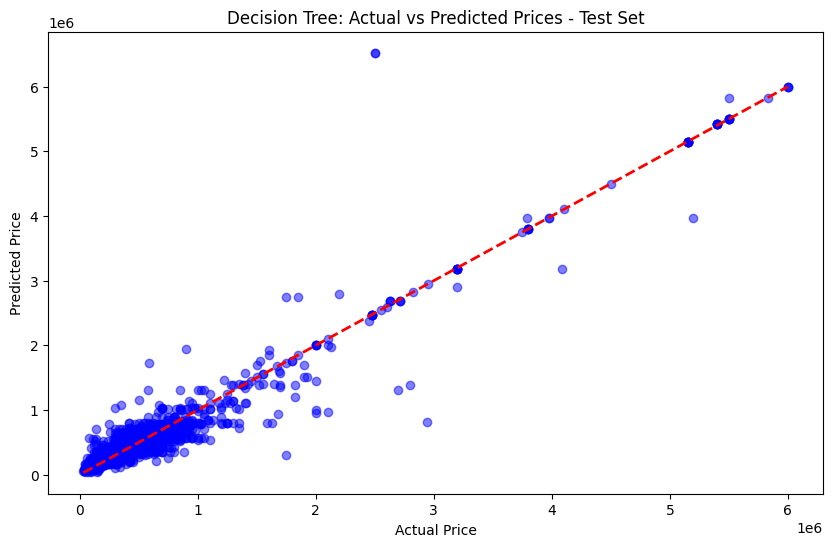

In [37]:
#prediction on Test data
# training_data_prediction=dt.predict(x_test)
# plt.scatter(y_test,training_data_prediction)
# plt.xlabel("Actual Price")
# plt.ylabel("Predicted Price")
# plt.title("Actual Prices vs Predicted Prices")
# plt.show()

y_pred_test = dt.predict(x_test)

# Plot actual vs. predicted prices for the test set
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_test, color="blue", alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2, color='red')
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Decision Tree: Actual vs Predicted Prices - Test Set')
plt.show()

In [38]:
#checking the accuracy of the model for random forest
rf=RandomForestRegressor()
rf.fit(x_train,y_train)
y_pred_train = rf.predict(x_train)
y_pred_test = rf.predict(x_test)

# Calculate metrics
train_r2 = r2_score(y_train, y_pred_train)
test_r2 = r2_score(y_test, y_pred_test)
train_mse = mean_squared_error(y_train, y_pred_train)
test_mse = mean_squared_error(y_test, y_pred_test)
train_mae = mean_absolute_error(y_train, y_pred_train)
test_mae = mean_absolute_error(y_test, y_pred_test)

# Print results
print(f"Train R^2 Score: {train_r2}")
print(f"Test R^2 Score: {test_r2}")
print(f"Train Mean Squared Error: {train_mse}")
print(f"Test Mean Squared Error: {test_mse}")
print(f"Train Mean Absolute Error: {train_mae}")
print(f"Test Mean Absolute Error: {test_mae}")

Train R^2 Score: 0.9902197914783696
Test R^2 Score: 0.9588585278043934
Train Mean Squared Error: 6391012269.751053
Test Mean Squared Error: 28604967880.692993
Train Mean Absolute Error: 41119.46157499176
Test Mean Absolute Error: 85122.43109119845


C:\Users\Musharraf khan\AppData\Local\Temp\ipykernel_14912\3913124887.py:6: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k--" (-> color='k'). The keyword argument will take precedence.
  plt.plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], 'k--', lw=2, color='red')


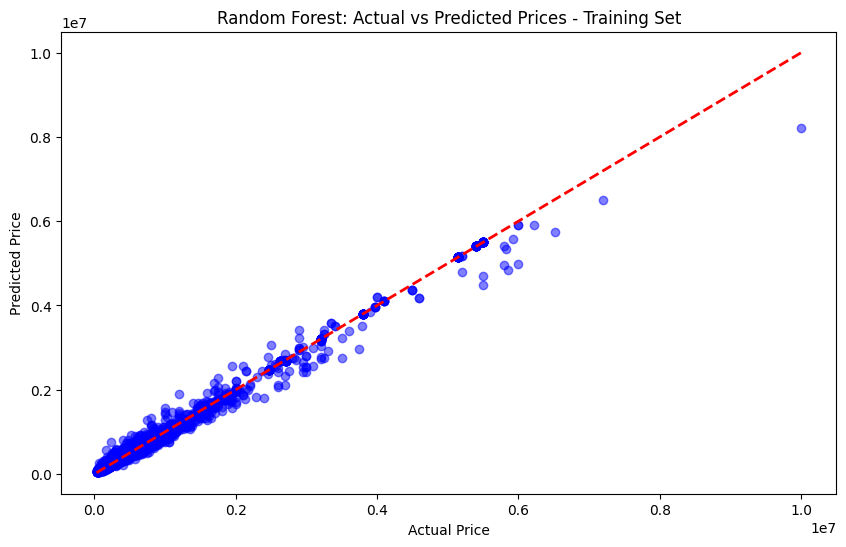

In [39]:
y_pred_train = rf.predict(x_train)

# Plot actual vs. predicted prices for the training set
plt.figure(figsize=(10, 6))
plt.scatter(y_train, y_pred_train, color="blue", alpha=0.5)
plt.plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], 'k--', lw=2, color='red')
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Random Forest: Actual vs Predicted Prices - Training Set')
plt.show()

C:\Users\Musharraf khan\AppData\Local\Temp\ipykernel_14912\1955274583.py:7: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k--" (-> color='k'). The keyword argument will take precedence.
  plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2, color='red')


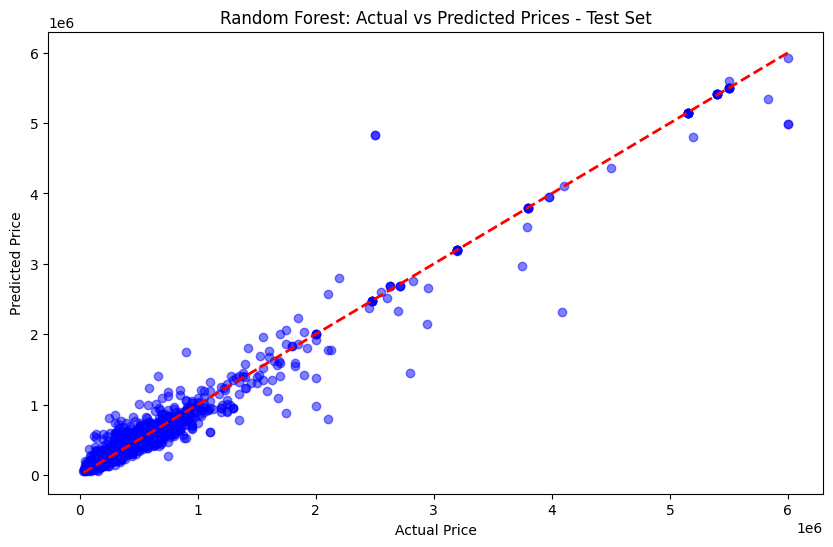

In [40]:
# Predicting on the test set
y_pred_test = rf.predict(x_test)

# Plot actual vs. predicted prices for the test set
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_test, color="blue", alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2, color='red')
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Random Forest: Actual vs Predicted Prices - Test Set')
plt.show()

In [41]:
#checking the accuracy of the model for support vector machine
sv=SVR()
sv.fit(x_train,y_train)
y_pred_train = sv.predict(x_train)
y_pred_test = sv.predict(x_test)

# Calculate metrics
train_r2 = r2_score(y_train, y_pred_train)
test_r2 = r2_score(y_test, y_pred_test)
train_mse = mean_squared_error(y_train, y_pred_train)
test_mse = mean_squared_error(y_test, y_pred_test)
train_mae = mean_absolute_error(y_train, y_pred_train)
test_mae = mean_absolute_error(y_test, y_pred_test)

# Print results
print(f"Train R^2 Score: {train_r2}")
print(f"Test R^2 Score: {test_r2}")
print(f"Train Mean Squared Error: {train_mse}")
print(f"Test Mean Squared Error: {test_mse}")
print(f"Train Mean Absolute Error: {train_mae}")
print(f"Test Mean Absolute Error: {test_mae}")


Train R^2 Score: -0.059094546688536864
Test R^2 Score: -0.05394499544301601
Train Mean Squared Error: 692079951847.9459
Test Mean Squared Error: 732790080999.6788
Train Mean Absolute Error: 383152.2019968276
Test Mean Absolute Error: 386055.48891130445


C:\Users\Musharraf khan\AppData\Local\Temp\ipykernel_14912\4188999257.py:14: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k--" (-> color='k'). The keyword argument will take precedence.
  plt.plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], 'k--', lw=2, color='red')


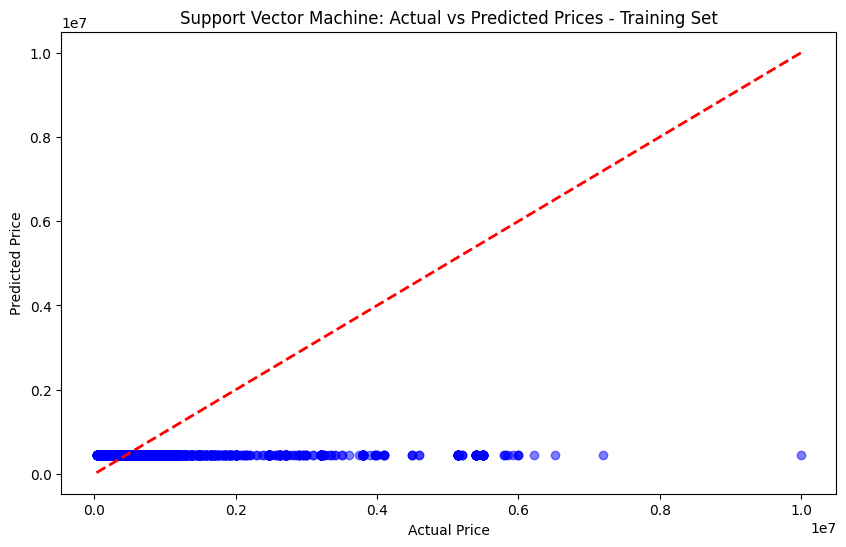

In [42]:
#prediction on Training data
# training_data_prediction=sv.predict(x_train)
# plt.scatter(y_train,training_data_prediction)
# plt.xlabel("Actual Price")
# plt.ylabel("Predicted Price")
# plt.title("Actual Prices vs Predicted Prices")
# plt.show()

y_pred_train = sv.predict(x_train)

# Plot actual vs. predicted prices for the training set
plt.figure(figsize=(10, 6))
plt.scatter(y_train, y_pred_train, color="blue", alpha=0.5)
plt.plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], 'k--', lw=2, color='red')
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Support Vector Machine: Actual vs Predicted Prices - Training Set')
plt.show()

C:\Users\Musharraf khan\AppData\Local\Temp\ipykernel_14912\3483336611.py:14: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k--" (-> color='k'). The keyword argument will take precedence.
  plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2, color='red')


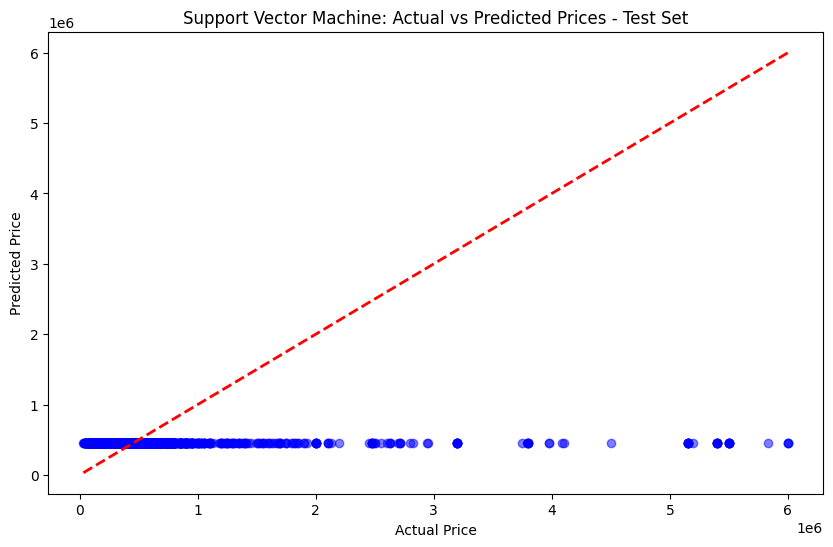

In [43]:
# #prediction on Test data
# training_data_prediction=sv.predict(x_test)
# plt.scatter(y_test,training_data_prediction)
# plt.xlabel("Actual Price")
# plt.ylabel("Predicted Price")
# plt.title("Actual Prices vs Predicted Prices")
# plt.show()

y_pred_test = sv.predict(x_test)

# Plot actual vs. predicted prices for the test set
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_test, color="blue", alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2, color='red')
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Support Vector Machine: Actual vs Predicted Prices - Test Set')
plt.show()

In [44]:
#checking the accuracy of the model for k nearest neighbours
knn=KNeighborsRegressor()
knn.fit(x_train,y_train)
y_pred_train = knn.predict(x_train)
y_pred_test = knn.predict(x_test)

# Calculate metrics
train_r2 = r2_score(y_train, y_pred_train)
test_r2 = r2_score(y_test, y_pred_test)
train_mse = mean_squared_error(y_train, y_pred_train)
test_mse = mean_squared_error(y_test, y_pred_test)
train_mae = mean_absolute_error(y_train, y_pred_train)
test_mae = mean_absolute_error(y_test, y_pred_test)

# Print results
print(f"Train R^2 Score: {train_r2}")
print(f"Test R^2 Score: {test_r2}")
print(f"Train Mean Squared Error: {train_mse}")
print(f"Test Mean Squared Error: {test_mse}")
print(f"Train Mean Absolute Error: {train_mae}")
print(f"Test Mean Absolute Error: {test_mae}")

Train R^2 Score: 0.9354331931973202
Test R^2 Score: 0.9069186326799887
Train Mean Squared Error: 42192071220.35679
Test Mean Squared Error: 64717896088.420456
Train Mean Absolute Error: 99184.18327008223
Test Mean Absolute Error: 124456.47547408345


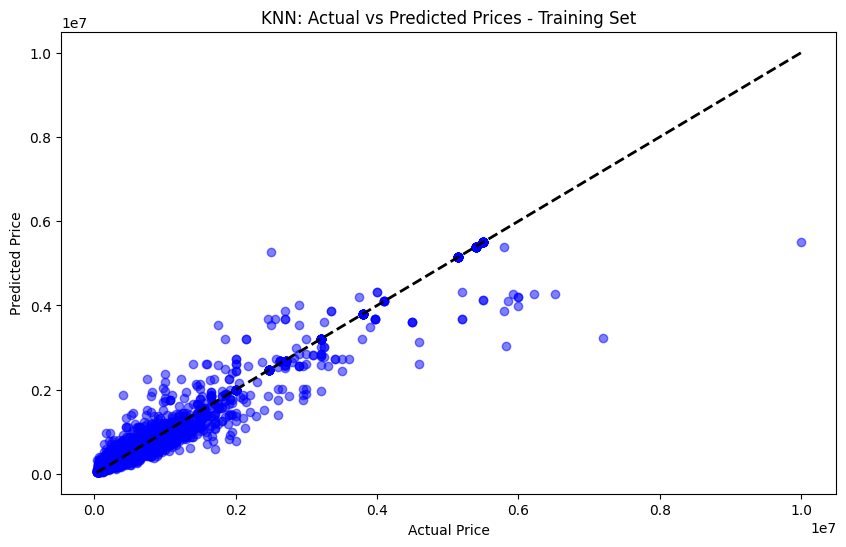

In [45]:
#prediction on Training data
training_data_prediction=knn.predict(x_train)
# plt.scatter(y_train,training_data_prediction)
# plt.xlabel("Actual Price")
# plt.ylabel("Predicted Price")
# plt.title("Actual Prices vs Predicted Prices")
# plt.show()

plt.figure(figsize=(10, 6))
plt.scatter(y_train, training_data_prediction, color="blue", alpha=0.5)
plt.plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], 'k--', lw=2)
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('KNN: Actual vs Predicted Prices - Training Set')
plt.show()

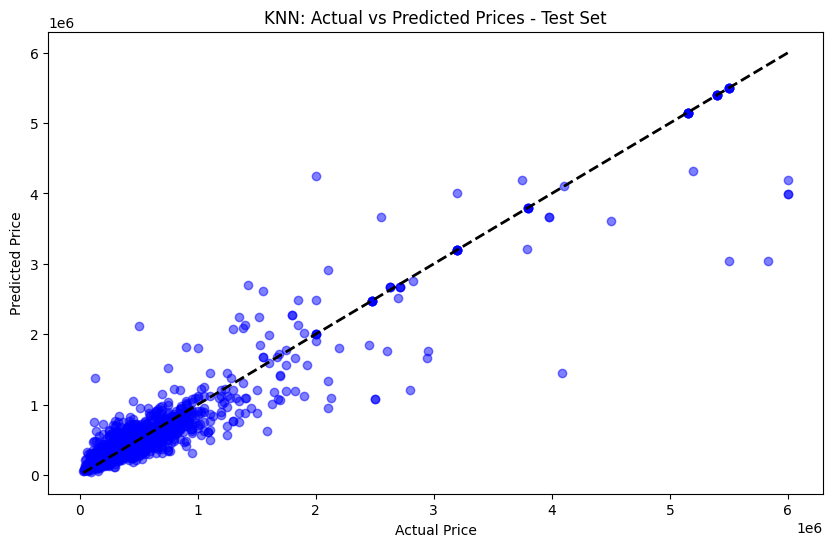

In [46]:
#prediction on Test data
training_data_prediction=knn.predict(x_test)
# plt.scatter(y_test,training_data_prediction)
# plt.xlabel("Actual Price")
# plt.ylabel("Predicted Price")
# plt.title("Actual Prices vs Predicted Prices")
# plt.show()

# Plot actual vs. predicted prices for the test set
plt.figure(figsize=(10, 6))
plt.scatter(y_test, training_data_prediction, color="blue", alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('KNN: Actual vs Predicted Prices - Test Set')
plt.show()

In [47]:
# Initialize the model with hyperparameters
gbm = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)

# Train the model
gbm.fit(x_train, y_train)

# Make predictions
y_pred_train = gbm.predict(x_train)
y_pred_test = gbm.predict(x_test)

# Evaluate model performance
train_score = r2_score(y_train, y_pred_train)
test_score = r2_score(y_test, y_pred_test)
mse = mean_squared_error(y_test, y_pred_test)
mae = mean_absolute_error(y_test, y_pred_test)

print(f"Train R^2 Score: {train_score}")
print(f"Test R^2 Score: {test_score}")
print(f"Mean Squared Error: {mse}")
print(f"Mean Absolute Error: {mae}")



Train R^2 Score: 0.9470234020704333
Test R^2 Score: 0.944797259032464
Mean Squared Error: 38381529586.37211
Mean Absolute Error: 124034.87314621503


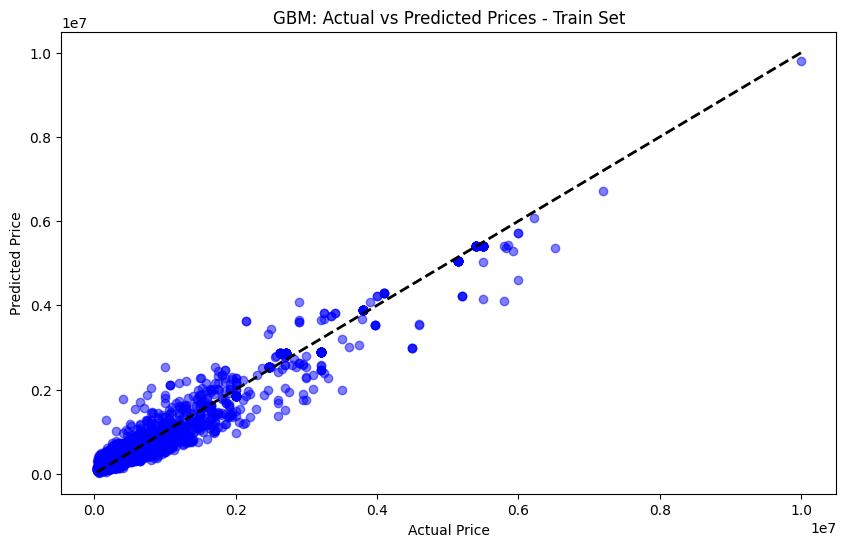

In [48]:
# Plot actual vs. predicted prices for the training set
plt.figure(figsize=(10, 6))
plt.scatter(y_train, y_pred_train, color="blue", alpha=0.5)
plt.plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], 'k--', lw=2)
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('GBM: Actual vs Predicted Prices - Train Set')
plt.show()


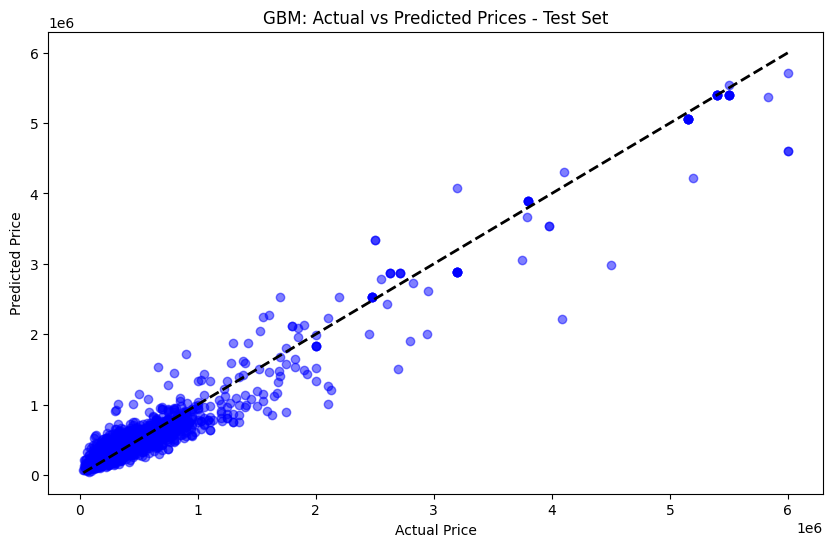

In [49]:
# Plot actual vs. predicted prices for the testing set
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_test, color="blue", alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('GBM: Actual vs Predicted Prices - Test Set')
plt.show()

In [50]:
# Import necessary libraries
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, StackingRegressor
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error

# Initialize individual models
rf = RandomForestRegressor()
gbm = GradientBoostingRegressor()
svr = SVR()
lr = LinearRegression()
dt = DecisionTreeRegressor()

# Fit individual models
rf.fit(x_train, y_train)
gbm.fit(x_train, y_train)
svr.fit(x_train, y_train)
lr.fit(x_train, y_train)
dt.fit(x_train, y_train)

# Make predictions with individual models
y_pred_rf = rf.predict(x_test)
y_pred_gbm = gbm.predict(x_test)
y_pred_svr = svr.predict(x_test)
y_pred_lr = lr.predict(x_test)
y_pred_dt = dt.predict(x_test)

# Evaluate individual models
r2_rf = r2_score(y_test, y_pred_rf)
mse_rf = mean_squared_error(y_test, y_pred_rf)

r2_gbm = r2_score(y_test, y_pred_gbm)
mse_gbm = mean_squared_error(y_test, y_pred_gbm)

r2_svr = r2_score(y_test, y_pred_svr)
mse_svr = mean_squared_error(y_test, y_pred_svr)

r2_lr = r2_score(y_test, y_pred_lr)
mse_lr = mean_squared_error(y_test, y_pred_lr)

r2_dt = r2_score(y_test, y_pred_dt)
mse_dt = mean_squared_error(y_test, y_pred_dt)

# Print results
print("Random Forest R² Score:", r2_rf)
print("Random Forest Mean Squared Error:", mse_rf)

print("Gradient Boosting R² Score:", r2_gbm)
print("Gradient Boosting Mean Squared Error:", mse_gbm)

print("Support Vector Regression R² Score:", r2_svr)
print("Support Vector Regression Mean Squared Error:", mse_svr)

print("Linear Regression R² Score:", r2_lr)
print("Linear Regression Mean Squared Error:", mse_lr)

print("Decision Tree R² Score:", r2_dt)
print("Decision Tree Mean Squared Error:", mse_dt)

# Determine which model performs best
model_performance = {
    "Random Forest": r2_rf,
    "Gradient Boosting": r2_gbm,
    "Support Vector Regression": r2_svr,
    "Linear Regression": r2_lr,
    "Decision Tree": r2_dt,
}

best_model = max(model_performance, key=model_performance.get)

print(f"The best performing model is: {best_model} with R² Score: {model_performance[best_model]}")


Random Forest R² Score: 0.9667090881172273
Random Forest Mean Squared Error: 23146606436.3974
Gradient Boosting R² Score: 0.9446985813295238
Gradient Boosting Mean Squared Error: 38450138519.70656
Support Vector Regression R² Score: -0.05394499544301601
Support Vector Regression Mean Squared Error: 732790080999.6788
Linear Regression R² Score: 0.6616136990525139
Linear Regression Mean Squared Error: 235274256201.82373
Decision Tree R² Score: 0.949659942993786
Decision Tree Mean Squared Error: 35000587896.530815
The best performing model is: Random Forest with R² Score: 0.9667090881172273


In [87]:
import pickle as pk
pk.dump(rf,open('model1.pkl','wb'))
pk.dump(dt,open('model2.pkl','wb'))
model1 = pk.load(open('model1.pkl', 'rb'))
model2 = pk.load(open('model2.pkl', 'rb'))


Loading new datas for price prediction

In [92]:
new_data=pd.DataFrame([["Mahindra Scorpio",38553,"Diesel","Individual","Manual","First Owner",2179.0,140,5.0]],columns=x_train.columns)
# Transforming the data to suitable form
new_data['name']=car_name_le.transform(new_data["name"])
new_data['fuel']=fuel_le.transform(new_data["fuel"])
new_data['seller_type']=seller_type_le.transform(new_data["seller_type"])
new_data['transmission']=transmission_type_le.transform(new_data["transmission"])
new_data['owner']=owner_type_le.transform(new_data["owner"])

#scaling the input data
new_data=pd.DataFrame(ss.transform(new_data),columns=new_data.columns)

#Predicting the actual value
print("The predicted value of car using Random forest : ", model1.predict(new_data))
print("The predicted value of car using Decision tree : ", model2.predict(new_data))


The predicted value of car using Random forest :  [1357225.]
The predicted value of car using Decision tree :  [1500000.]


In [94]:
new_data=pd.DataFrame([["MG Hector",26999,"Petrol","Individual","Automatic","First Owner",1451.0,143,5.0]],columns=x_train.columns)
# Transforming the data to suitable form
new_data['name']=car_name_le.transform(new_data["name"])
new_data['fuel']=fuel_le.transform(new_data["fuel"])
new_data['seller_type']=seller_type_le.transform(new_data["seller_type"])
new_data['transmission']=transmission_type_le.transform(new_data["transmission"])
new_data['owner']=owner_type_le.transform(new_data["owner"])

#scaling the input data
new_data=pd.DataFrame(ss.transform(new_data),columns=new_data.columns)

#Predicting the actual value
print("The predicted value of car using Random forest : ", model1.predict(new_data))
print("The predicted value of car using Decision tree : ", model2.predict(new_data))



The predicted value of car using Random forest :  [1385399.99]
The predicted value of car using Decision tree :  [1400000.]


In [96]:
new_data=pd.DataFrame([["Ford Ecosport",48466,"Petrol","Individual","Manual","First Owner",1497.0,123,5.0]],columns=x_train.columns)
# Transforming the data to suitable form
new_data['name']=car_name_le.transform(new_data["name"])
new_data['fuel']=fuel_le.transform(new_data["fuel"])
new_data['seller_type']=seller_type_le.transform(new_data["seller_type"])
new_data['transmission']=transmission_type_le.transform(new_data["transmission"])
new_data['owner']=owner_type_le.transform(new_data["owner"])

#scaling the input data
new_data=pd.DataFrame(ss.transform(new_data),columns=new_data.columns)

#Predicting the actual value
print("The predicted value of car using Random forest : ", model1.predict(new_data))
print("The predicted value of car using Decision tree : ", model2.predict(new_data))


The predicted value of car using Random forest :  [663095.]
The predicted value of car using Decision tree :  [450000.]


In [97]:
new_data=pd.DataFrame([["Maruti Ciaz",76156,"Petrol","Individual","Manual","First Owner",1462.0,105,5.0]],columns=x_train.columns)
# Transforming the data to suitable form
new_data['name']=car_name_le.transform(new_data["name"])
new_data['fuel']=fuel_le.transform(new_data["fuel"])
new_data['seller_type']=seller_type_le.transform(new_data["seller_type"])
new_data['transmission']=transmission_type_le.transform(new_data["transmission"])
new_data['owner']=owner_type_le.transform(new_data["owner"])

#scaling the input data
new_data=pd.DataFrame(ss.transform(new_data),columns=new_data.columns)

#Predicting the actual value
print("The predicted value of car using Random forest : ", model1.predict(new_data))
print("The predicted value of car using Decision tree : ", model2.predict(new_data))



The predicted value of car using Random forest :  [517018.65666667]
The predicted value of car using Decision tree :  [390000.]


In [99]:
new_data=pd.DataFrame([["Hyundai Xcent",61102,"Petrol","Individual","Manual","First Owner",1197.0,83,5.0]],columns=x_train.columns)
# Transforming the data to suitable form
new_data['name']=car_name_le.transform(new_data["name"])
new_data['fuel']=fuel_le.transform(new_data["fuel"])
new_data['seller_type']=seller_type_le.transform(new_data["seller_type"])
new_data['transmission']=transmission_type_le.transform(new_data["transmission"])
new_data['owner']=owner_type_le.transform(new_data["owner"])

#scaling the input data
new_data=pd.DataFrame(ss.transform(new_data),columns=new_data.columns)

#Predicting the actual value
print("The predicted value of car using Random forest : ", model1.predict(new_data))
print("The predicted value of car using Decision tree : ", model2.predict(new_data))


The predicted value of car using Random forest :  [425940.62642857]
The predicted value of car using Decision tree :  [400000.]


In [102]:
new_data=pd.DataFrame([["Hyundai Venue",36125,"Petrol","Dealer","Manual","First Owner",998.0,120,5.0]],columns=x_train.columns)
# Transforming the data to suitable form
new_data['name']=car_name_le.transform(new_data["name"])
new_data['fuel']=fuel_le.transform(new_data["fuel"])
new_data['seller_type']=seller_type_le.transform(new_data["seller_type"])
new_data['transmission']=transmission_type_le.transform(new_data["transmission"])
new_data['owner']=owner_type_le.transform(new_data["owner"])

#scaling the input data
new_data=pd.DataFrame(ss.transform(new_data),columns=new_data.columns)

#Predicting the actual value
print("The predicted value of car using Random forest : ", model1.predict(new_data))
print("The predicted value of car using Decision tree : ", model2.predict(new_data))



The predicted value of car using Random forest :  [727244.97]
The predicted value of car using Decision tree :  [700000.]


In [103]:
new_data=pd.DataFrame([["Hyundai Grand",37838,"CNG","Dealer","Manual","First Owner",1197.0,69,5.0]],columns=x_train.columns)
# Transforming the data to suitable form
new_data['name']=car_name_le.transform(new_data["name"])
new_data['fuel']=fuel_le.transform(new_data["fuel"])
new_data['seller_type']=seller_type_le.transform(new_data["seller_type"])
new_data['transmission']=transmission_type_le.transform(new_data["transmission"])
new_data['owner']=owner_type_le.transform(new_data["owner"])

#scaling the input data
new_data=pd.DataFrame(ss.transform(new_data),columns=new_data.columns)

#Predicting the actual value
print("The predicted value of car using Random forest : ", model1.predict(new_data))
print("The predicted value of car using Decision tree : ", model2.predict(new_data))



The predicted value of car using Random forest :  [378794.95]
The predicted value of car using Decision tree :  [330000.]


In [104]:
# # Transforming the data to suitable form
# new_data['name']=car_name_le.transform(new_data["name"])
# new_data['fuel']=fuel_le.transform(new_data["fuel"])
# new_data['seller_type']=seller_type_le.transform(new_data["seller_type"])
# new_data['transmission']=transmission_type_le.transform(new_data["transmission"])
# new_data['owner']=owner_type_le.transform(new_data["owner"])

# #scaling the input data
# new_data=pd.DataFrame(ss.transform(new_data),columns=new_data.columns)

# #Predicting the actual value
# print("The predicted value of car using Decision tree : ", dt.predict(new_data))
# print("The predicted value of car using Random forest : ", rf.predict(new_data))